In [1]:
# Install necessary libraries
!pip install pandas matplotlib seaborn dtale plotly openpyxl --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter

In [27]:
# Load the dataset
df = pd.read_csv("/content/ccd_data.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # clean column names

# Basic Overview
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (12427, 11)
Columns: Index(['rate', 'quantity', 'discount', 'item_name', 'sales_amount',
       'net_sales', 'month', 'date', 'discount_per_unit', 'year', 'id'],
      dtype='object')


In [3]:
print(df.dtypes)
print("*"*20)
print(df.isnull().sum())
print("*"*20)
df.describe()

rate                 float64
quantity               int64
discount             float64
item_name             object
sales_amount         float64
net_sales            float64
month                float64
date                  object
discount_per_unit    float64
year                 float64
id                     int64
dtype: object
********************
rate                     0
quantity                 0
discount                 0
item_name                0
sales_amount             0
net_sales                0
month                12427
date                     0
discount_per_unit        0
year                 12427
id                       0
dtype: int64
********************


,rate,quantity,discount,sales_amount,net_sales,month,discount_per_unit,year,id
count,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,0.0,12427.000000,0.0,12427.000000
mean,179.649389,17.560554,49.002510,2938.722652,2889.720142,NaN,2.880869,NaN,6214.000000
std,43.279849,13.583854,43.561392,2002.311944,1968.779849,NaN,1.177801,NaN,3587.510232
min,89.480000,1.000000,0.730000,99.790000,98.880000,NaN,0.580000,NaN,1.000000
25%,147.590000,8.000000,18.120000,1342.200000,1323.720000,NaN,1.940000,NaN,3107.500000
50%,179.990000,15.000000,36.960000,2594.920000,2533.160000,NaN,2.920000,NaN,6214.000000
75%,222.930000,24.000000,67.720000,4217.000000,4153.100000,NaN,3.890000,NaN,9320.500000
max,252.240000,162.000000,467.360000,16959.780000,16805.880000,NaN,4.840000,NaN,12427.000000


In [4]:
print(df.shape)
df = df.drop(columns=["month", "year"])
print(df.shape)

(12427, 11)
(12427, 9)


In [5]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [6]:
# Ensure 'month' is datetime format
df['date'] = pd.to_datetime(df['date'])

In [7]:
df

,rate,quantity,discount,item_name,sales_amount,net_sales,date,discount_per_unit,id
0,173.56,60,275.40,Signature Choco Fantasy,10413.60,10138.20,2023-01-01,4.59,1
1,180.56,53,55.12,Classic New York Cheesecake,9569.68,9514.56,2023-01-01,1.04,2
2,172.51,68,228.48,Tandoori Chicken Double Decker Sandwich,11730.68,11502.20,2023-01-01,3.36,3
3,173.56,51,234.09,Signature Choco Fantasy,8851.56,8617.47,2023-01-01,4.59,4
4,141.44,60,198.60,Cheese Tomato Croissant Sliders,8486.40,8287.80,2023-01-14,3.31,5
...,...,...,...,...,...,...,...,...,...
12422,243.15,11,18.48,Peanut Butter Banana Frappe,2674.65,2656.17,2024-12-24,1.68,12423
12423,125.37,13,29.64,Death By Chocolate Sundae,1629.81,1600.17,2024-12-24,2.28,12424
12424,163.93,5,15.95,Berry Vanilla Croissant Sundae,819.65,803.70,2024-12-24,3.19,12425
12425,237.94,7,21.14,Choco Nirvana Sundae,1665.58,1644.44,2024-12-25,3.02,12426


In [8]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [9]:
df.isna().sum()

,0
rate,0
quantity,0
discount,0
item_name,0
sales_amount,0
net_sales,0
date,0
discount_per_unit,0
id,0
month,0


In [10]:
# Group monthly net sales for 2024
df_2024 = df[df["year"] == 2024].reset_index(drop=True)
monthly_2024 = df_2024.groupby("month")["net_sales"].sum().rename("Net Sales 2024")

# Combine side by side
monthly_comparison = pd.concat([monthly_2024], axis=1)

# Optional: Replace month numbers with names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_comparison.index = [month_names[i-1] for i in monthly_comparison.index]

# Display
print(monthly_comparison)


     Net Sales 2024
Jan      2808549.96
Feb      1684429.74
Mar      1680417.28
Apr      1735190.40
May      1663412.12
Jun       500388.94
Jul       457469.96
Aug      1703367.21
Sep      1752033.70
Oct      1712927.76
Nov      1796142.15
Dec       475673.47


<ipython-input-11-568268d25aa1>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_2024 = df_2024.groupby('month_name')['net_sales'].sum().reset_index()
<ipython-input-11-568268d25aa1>:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


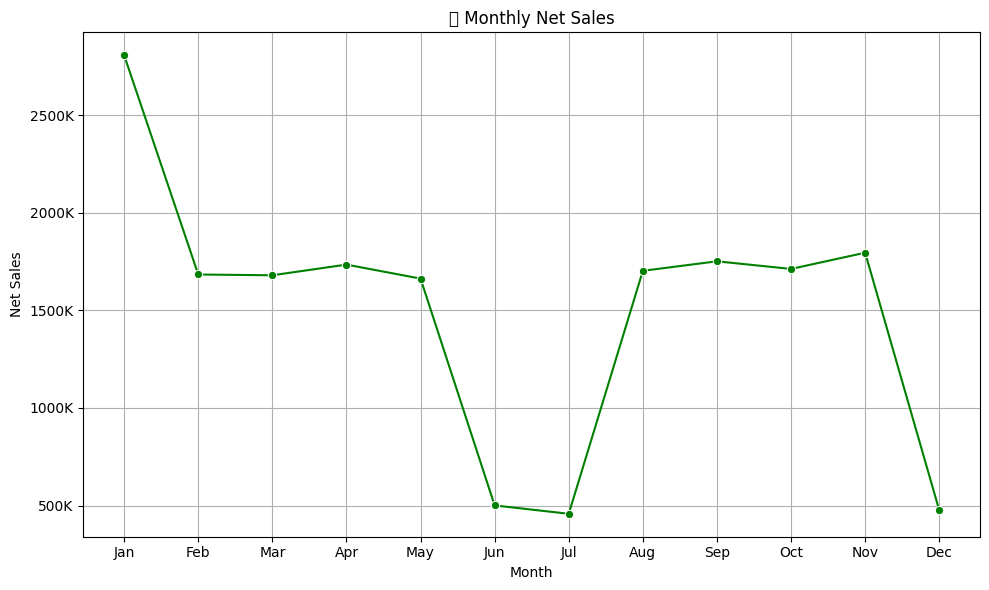

In [11]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create ordered month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month_name'] = df['month'].apply(lambda x: month_names[x - 1])
df['month_name'] = pd.Categorical(df['month_name'], categories=month_names, ordered=True)

# Filter for 2024
df_2024 = df[df['year'] == 2024]

# Group by month and calculate total net sales
monthly_sales_2024 = df_2024.groupby('month_name')['net_sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales_2024, x='month_name', y='net_sales', marker='o', color='green')

# Format Y-axis as Millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.0f}K'))

# Add labels and title
plt.title("📈 Monthly Net Sales")
plt.xlabel("Month")
plt.ylabel("Net Sales")
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
df.groupby("month")["net_sales"].sum()

,net_sales
month,
1,5619536.17
2,3366320.45
3,3370829.66
4,3457598.71
5,3318781.38
6,995598.39
7,920145.53
8,3390964.92
9,3494522.58


In [13]:
# Duplicates
print("Duplicates:", df.duplicated().sum())
df.head()

Duplicates: 0


,rate,quantity,discount,item_name,sales_amount,net_sales,date,discount_per_unit,id,month,year,month_name
0,173.56,60,275.40,Signature Choco Fantasy,10413.60,10138.20,2023-01-01,4.59,1,1,2023,Jan
1,180.56,53,55.12,Classic New York Cheesecake,9569.68,9514.56,2023-01-01,1.04,2,1,2023,Jan
2,172.51,68,228.48,Tandoori Chicken Double Decker Sandwich,11730.68,11502.20,2023-01-01,3.36,3,1,2023,Jan
3,173.56,51,234.09,Signature Choco Fantasy,8851.56,8617.47,2023-01-01,4.59,4,1,2023,Jan
4,141.44,60,198.60,Cheese Tomato Croissant Sliders,8486.40,8287.80,2023-01-14,3.31,5,1,2023,Jan


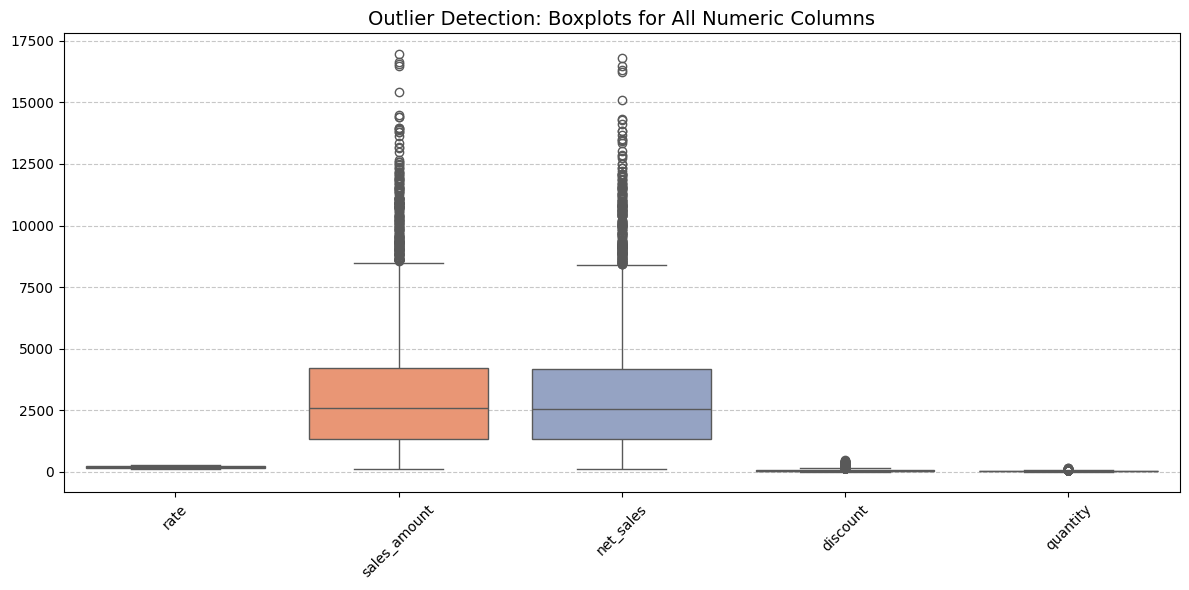

In [14]:
# Select numeric columns (excluding 'id', 'month', 'year')
num_cols = list(set(df.select_dtypes(include=np.number).columns) - set(['id', 'month', 'year']))

# Plot all boxplots in one figure
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['rate','sales_amount','net_sales','discount','quantity']], orient='v', palette='Set2')
plt.title('Outlier Detection: Boxplots for All Numeric Columns', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

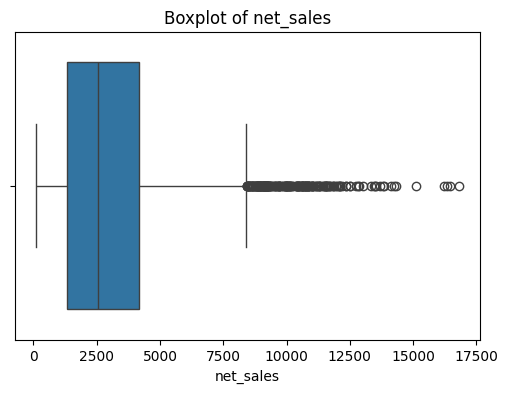

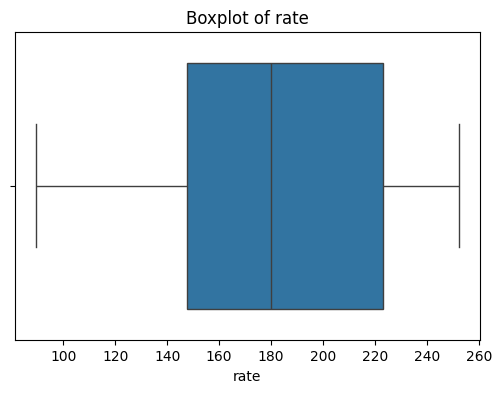

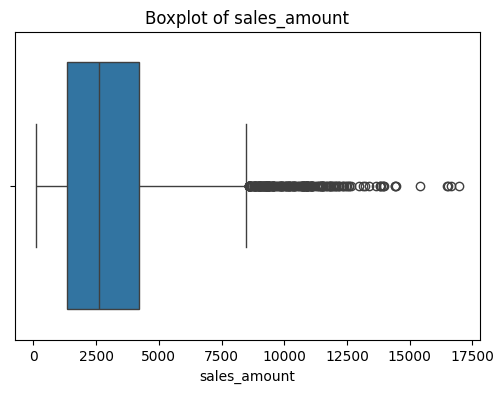

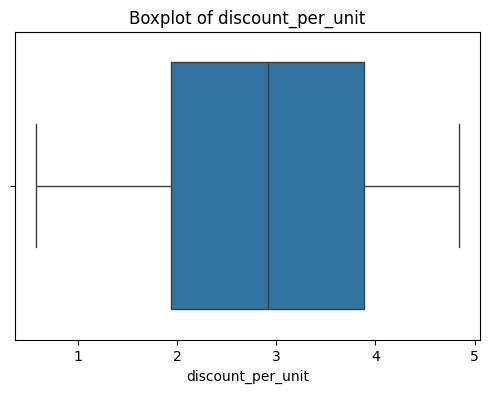

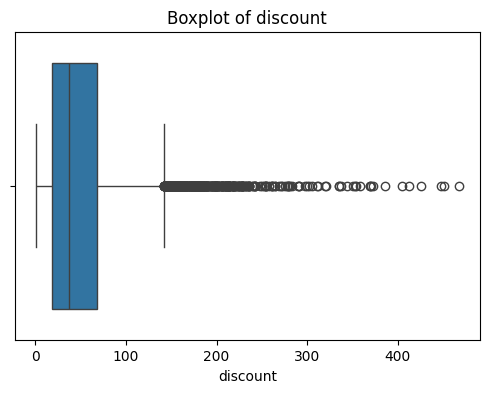

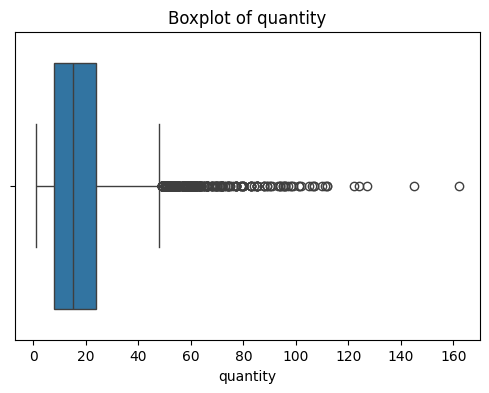

In [15]:
# Outlier detection via Boxplots
num_cols = list(set(df.select_dtypes(include=np.number).columns) - set(['id', 'month', 'year']))
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [16]:
# Log Transformation of Skewed Columns
for col in num_cols:
    if (df[col] > 0).all() & (col not in ["rate"]):
        df[f'log_{col}'] = np.log(df[col] + 1)

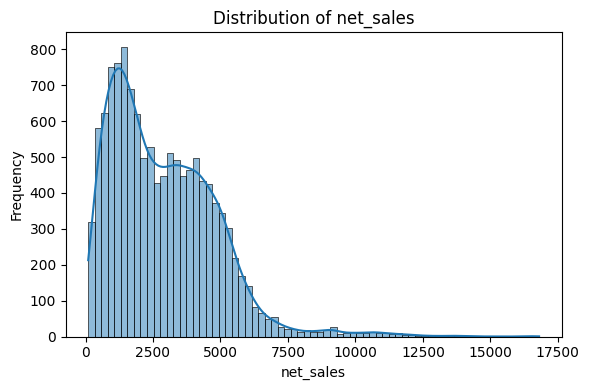

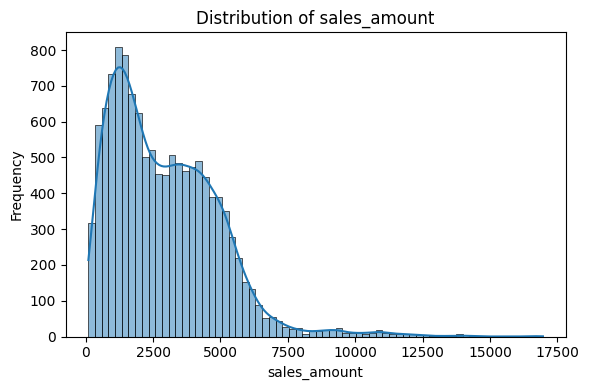

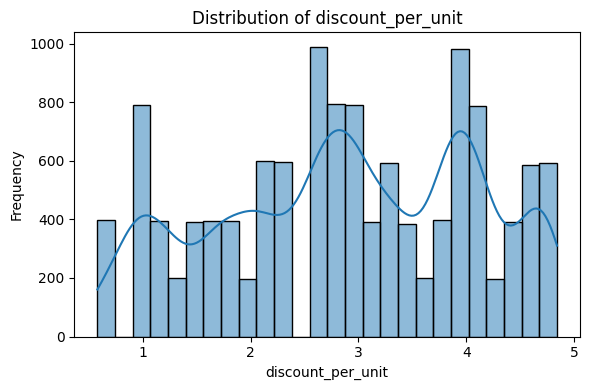

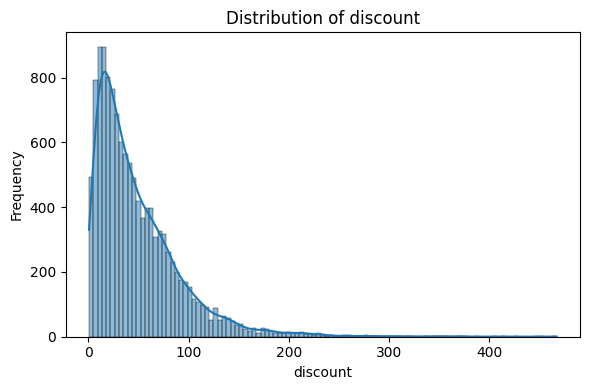

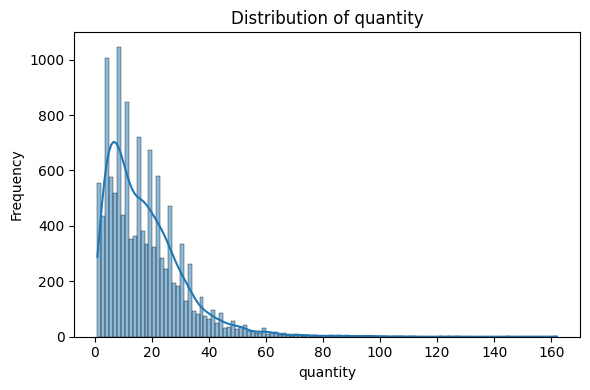

In [17]:
log_cols = df.columns[df.columns.str.contains("log", case=False)]

for col in log_cols:
    original_col = col.replace("log_", "")  # Extract original column name
    if original_col in df.columns:
        plt.figure(figsize=(6, 4))  # Create a single plot

        # Plot only the original column distribution
        sns.histplot(df[original_col], kde=True)
        plt.title(f'Distribution of {original_col}')
        plt.xlabel(original_col)
        plt.ylabel("Frequency")

        plt.tight_layout()
        plt.show()


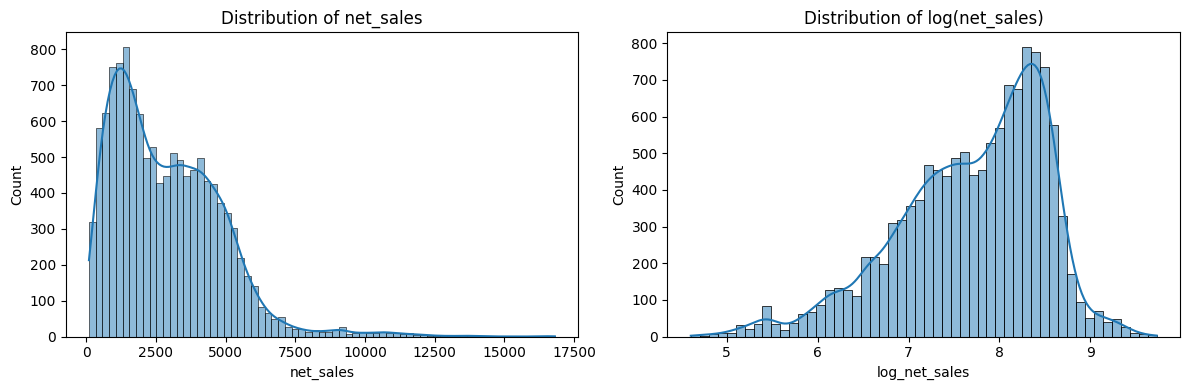

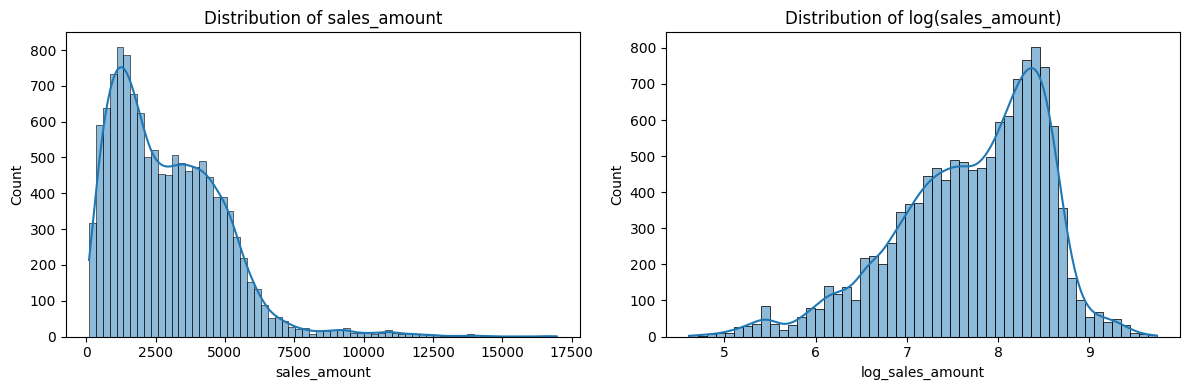

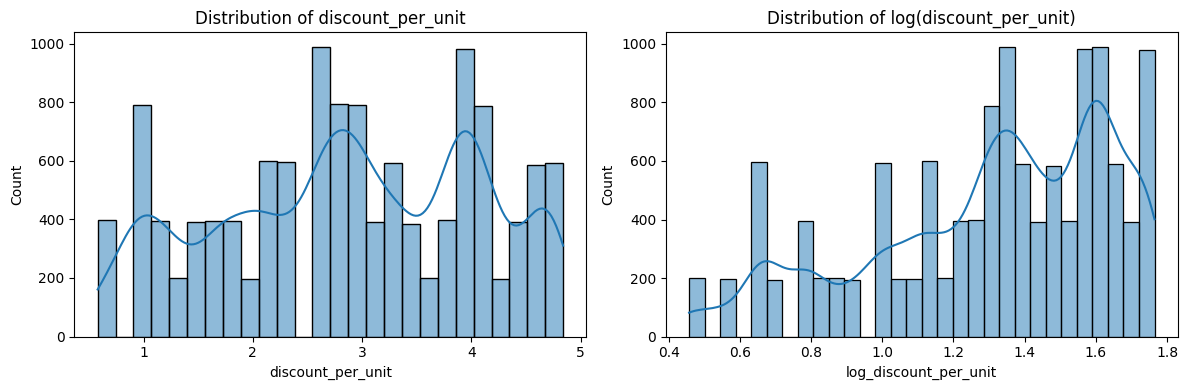

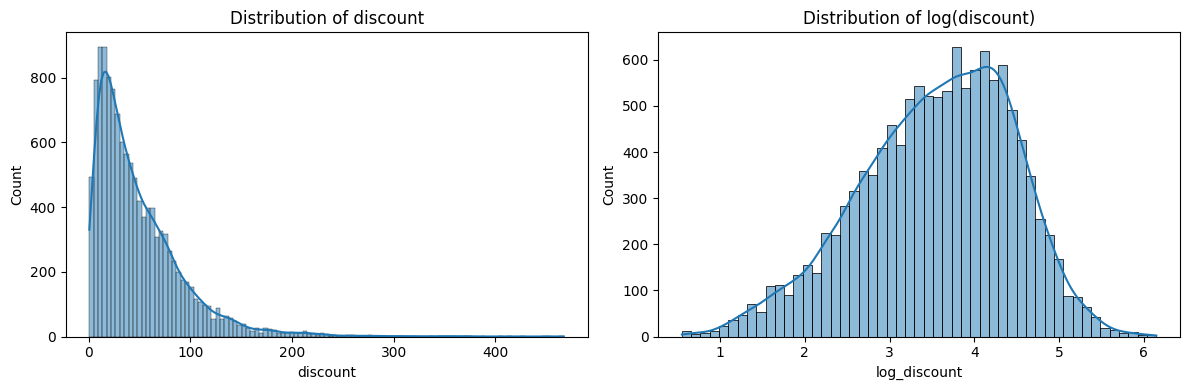

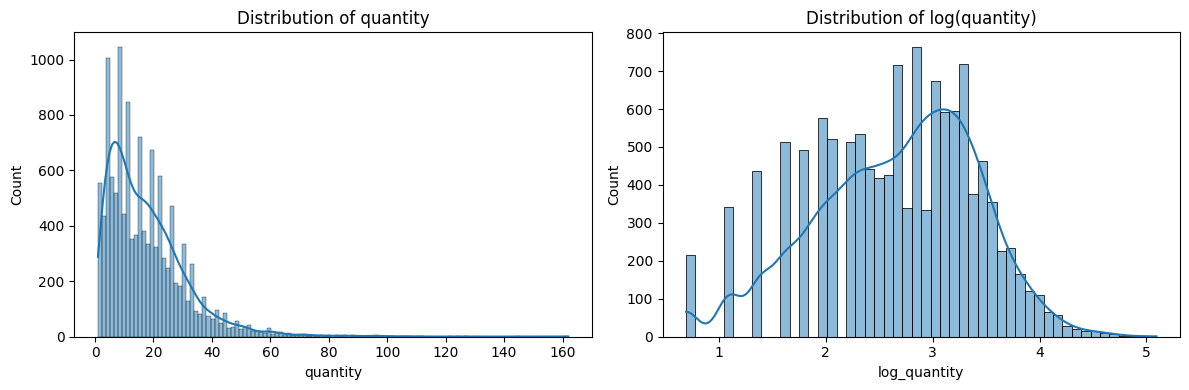

In [18]:
log_cols = df.columns[df.columns.str.contains("log", case=False)]

for col in log_cols:
    original_col = col.replace("log_", "")  # Extract original column name
    if original_col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create subplots

        # Plot original column
        sns.histplot(df[original_col], kde=True, ax=axes[0])
        axes[0].set_title(f'Distribution of {original_col}')

        # Plot log-transformed column
        sns.histplot(df[col], kde=True, ax=axes[1])
        axes[1].set_title(f'Distribution of log({original_col})')

        plt.tight_layout()  # Adjust layout to prevent overlapping
        plt.show()


In [19]:
df.describe()

,rate,quantity,discount,sales_amount,net_sales,date,discount_per_unit,id,month,year,log_net_sales,log_sales_amount,log_discount_per_unit,log_discount,log_quantity
count,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000
mean,179.649389,17.560554,49.002510,2938.722652,2889.720142,2023-12-30 04:08:40.286472960,2.880869,6214.000000,6.500684,2023.500604,7.697705,7.714467,1.302728,3.549303,2.660199
min,89.480000,1.000000,0.730000,99.790000,98.880000,2023-01-01 00:00:00,0.580000,1.000000,1.000000,2023.000000,4.603969,4.613039,0.457425,0.548121,0.693147
25%,147.590000,8.000000,18.120000,1342.200000,1323.720000,2023-06-28 00:00:00,1.940000,3107.500000,3.000000,2023.000000,7.188956,7.202810,1.078410,2.950735,2.197225
50%,179.990000,15.000000,36.960000,2594.920000,2533.160000,2024-01-01 00:00:00,2.920000,6214.000000,6.000000,2024.000000,7.837618,7.861696,1.366092,3.636533,2.772589
75%,222.930000,24.000000,67.720000,4217.000000,4153.100000,2024-06-28 00:00:00,3.890000,9320.500000,10.000000,2024.000000,8.331851,8.347116,1.587192,4.230040,3.218876
max,252.240000,162.000000,467.360000,16959.780000,16805.880000,2024-12-28 00:00:00,4.840000,12427.000000,12.000000,2024.000000,9.729544,9.738659,1.764731,6.149237,5.093750
std,43.279849,13.583854,43.561392,2002.311944,1968.779849,NaN,1.177801,3587.510232,3.460089,0.500020,0.811997,0.812051,0.340712,0.907578,0.759106


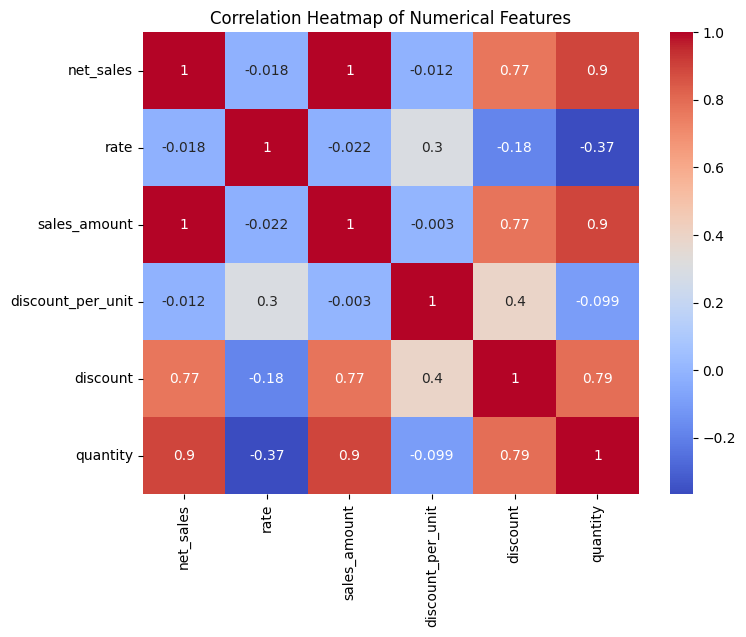

In [20]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


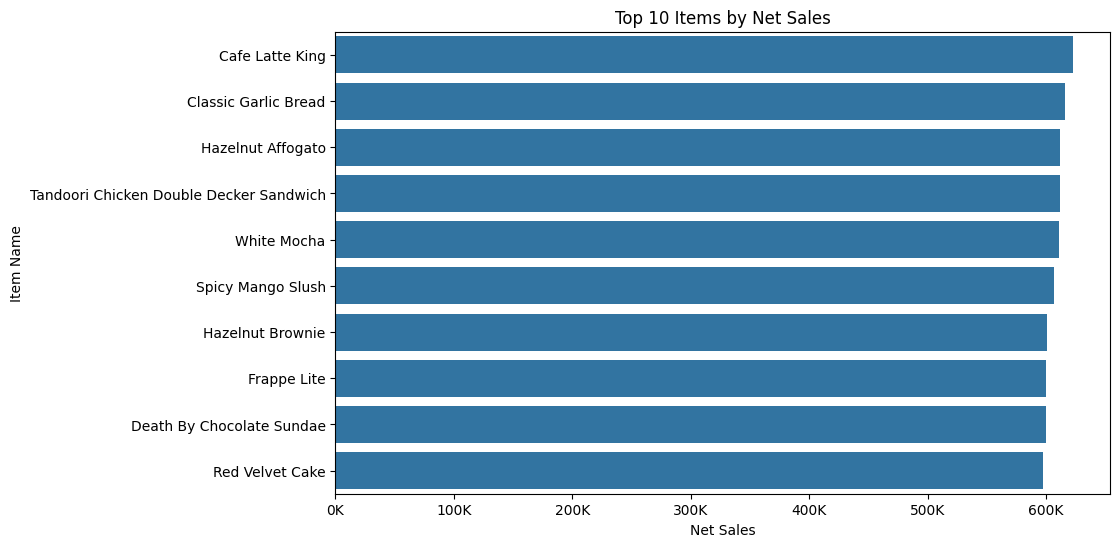

In [21]:
# Top items by net sales
if 'item_name' in df.columns:
    top_items = df.groupby('item_name')['net_sales'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_items.values, y=top_items.index)
    plt.title("Top 10 Items by Net Sales")
    plt.xlabel("Net Sales")
    plt.ylabel("Item Name")

    formatter = FuncFormatter(lambda x, _: f'{x/1000:.0f}K')
    plt.gca().xaxis.set_major_formatter(formatter)

    plt.show()

In [22]:
df

,rate,quantity,discount,item_name,sales_amount,net_sales,date,discount_per_unit,id,month,year,month_name,log_net_sales,log_sales_amount,log_discount_per_unit,log_discount,log_quantity
0,173.56,60,275.40,Signature Choco Fantasy,10413.60,10138.20,2023-01-01,4.59,1,1,2023,Jan,9.224164,9.250964,1.720979,5.621849,4.110874
1,180.56,53,55.12,Classic New York Cheesecake,9569.68,9514.56,2023-01-01,1.04,2,1,2023,Jan,9.160684,9.166460,0.712950,4.027492,3.988984
2,172.51,68,228.48,Tandoori Chicken Double Decker Sandwich,11730.68,11502.20,2023-01-01,3.36,3,1,2023,Jan,9.350381,9.370048,1.472472,5.435816,4.234107
3,173.56,51,234.09,Signature Choco Fantasy,8851.56,8617.47,2023-01-01,4.59,4,1,2023,Jan,9.061663,9.088462,1.720979,5.459968,3.951244
4,141.44,60,198.60,Cheese Tomato Croissant Sliders,8486.40,8287.80,2023-01-14,3.31,5,1,2023,Jan,9.022660,9.046338,1.460938,5.296315,4.110874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12422,243.15,11,18.48,Peanut Butter Banana Frappe,2674.65,2656.17,2024-12-24,1.68,12423,12,2024,Dec,7.885017,7.891948,0.985817,2.969388,2.484907
12423,125.37,13,29.64,Death By Chocolate Sundae,1629.81,1600.17,2024-12-24,2.28,12424,12,2024,Dec,7.378490,7.396832,1.187843,3.422306,2.639057
12424,163.93,5,15.95,Berry Vanilla Croissant Sundae,819.65,803.70,2024-12-24,3.19,12425,12,2024,Dec,6.690470,6.710097,1.432701,2.830268,1.791759
12425,237.94,7,21.14,Choco Nirvana Sundae,1665.58,1644.44,2024-12-25,3.02,12426,12,2024,Dec,7.405763,7.418529,1.391282,3.097386,2.079442


Text(0.5, 1.0, 'Discount vs Net Sales in (₹)')

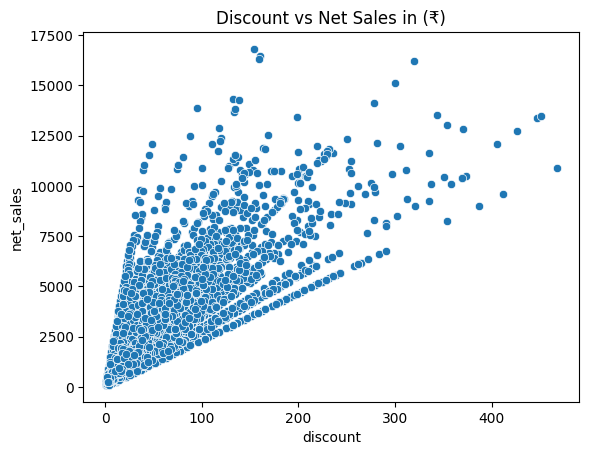

In [23]:
# 1. Discount vs Net Sales
sns.scatterplot(data=df, x='discount', y='net_sales')
plt.title("Discount vs Net Sales in (₹)")
#Insight: Helps decide if discounts are truly boosting revenue or just cutting margins.

Lost Revenue % Summary:
count    12427.000000
mean         1.660405
std          0.762283
min          0.364732
25%          1.155221
50%          1.599024
75%          1.961044
max          4.112651
Name: lost_revenue_pct, dtype: float64


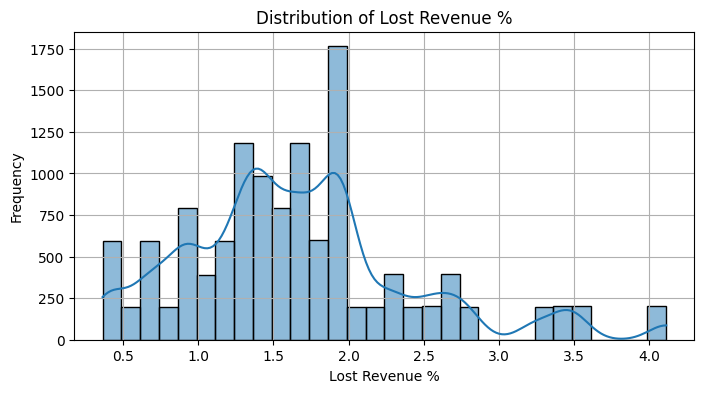


Number of sales with >20% lost revenue: 0


,rate,quantity,sales_amount,discount,net_sales,lost_revenue_pct


In [24]:
#Lost Revenue % tells you: How much of your gross sales you're sacrificing due to discounts.
# Step 1: Compute Lost Revenue %
df['lost_revenue_pct'] = (df['discount'] / df['sales_amount']) * 100

# Step 2: Display Summary Statistics
print("Lost Revenue % Summary:")
print(df['lost_revenue_pct'].describe())

# Step 3: Visualize Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['lost_revenue_pct'], bins=30, kde=True)
plt.title("Distribution of Lost Revenue %")
plt.xlabel("Lost Revenue %")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 4: Identify High Lost Revenue Cases
high_discount_df = df[df['lost_revenue_pct'] > 20]  # arbitrary threshold
print(f"\nNumber of sales with >20% lost revenue: {high_discount_df.shape[0]}")
display(high_discount_df[['rate', 'quantity', 'sales_amount', 'discount', 'net_sales', 'lost_revenue_pct']].head())


In [28]:
#Item-wise Lost Revenue % Analysis
# Step 1: Recalculate Lost Revenue % (if not already done)
df['lost_revenue_pct'] = (df['discount'] / df['sales_amount']) * 100

# Step 2: Check if item_name column exists
if 'item_name' in df.columns:
    # Step 3: Group by item and compute average lost revenue %
    item_discount = df.groupby('item_name').agg({
        'lost_revenue_pct': 'mean',
        'sales_amount': 'sum',
        'discount': 'sum',
        'net_sales': 'sum'
    }).reset_index()

    # Step 4: Sort by lost revenue %
    item_discount_sorted = item_discount.sort_values(by='lost_revenue_pct', ascending=False)

    # Step 5: Show top 10 items with highest average lost revenue %
    print("Top 10 Items by Average Lost Revenue % (High Discount Impact):")
    display(item_discount_sorted.head(10))

    # Step 6: Plot
    import plotly.express as px
    fig = px.bar(item_discount_sorted.head(10),
                 x='lost_revenue_pct',
                 y='item_name',
                 orientation='h',
                 title="Top 10 Items by Avg Lost Revenue %",
                 labels={'lost_revenue_pct': 'Avg Discount % of Sales Amount'},
                 hover_data=['sales_amount', 'discount', 'net_sales'])
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    fig.show()
else:
    print("⚠️ Column 'item_name' not found in your dataset.")


Top 10 Items by Average Lost Revenue % (High Discount Impact):


,item_name,lost_revenue_pct,sales_amount,discount,net_sales
30,Hazelnut Affogato,4.112651,638350.32,26253.12,612097.20
61,Vietnamese Iced Coffee,3.506031,614636.82,21549.36,593087.46
48,Salted Caramel Cappuccino,3.435393,595558.98,20459.79,575099.19
10,Caramel Affogato,3.240421,605178.81,19610.34,585568.47
4,Cafe Americano Strong,2.804071,587612.82,16477.08,571135.74
56,Spinach Corn N Cheese Sandwich,2.727693,560649.60,15292.80,545356.80
49,Signature Choco Fantasy,2.644619,559731.00,14802.75,544928.25
23,Elaichi Chai,2.554839,586830.00,14992.56,571837.44
24,Espresso,2.478112,600382.94,14878.16,585504.78
11,Cheese Tomato Croissant Sliders,2.340215,603383.04,14120.46,589262.58


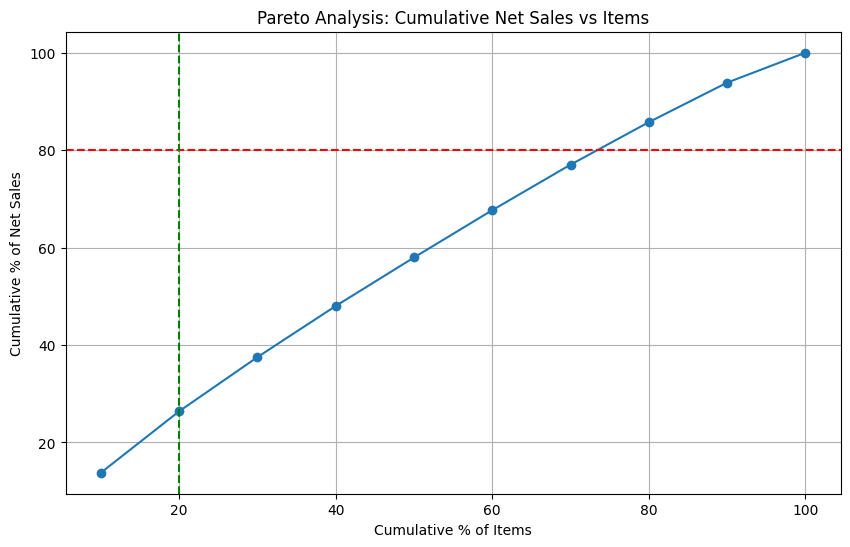

📊 7 out of 10 items (~70.00%) contribute to 80% of net sales.


In [26]:
#Determine whether 20% of items contribute to 80% of total net sales
# Check if 'item_name' column exists
if 'item_name' in df.columns:
    # Step 1: Calculate total net sales per item
    item_sales = df.groupby('item_name')['net_sales'].sum().reset_index()

    # Step 2: Sort items by net_sales in descending order
    item_sales = item_sales.sort_values(by='net_sales', ascending=False).reset_index(drop=True)

    # Step 3: Calculate cumulative % of sales and items
    item_sales['cum_sales_pct'] = item_sales['net_sales'].cumsum() / item_sales['net_sales'].sum() * 100
    item_sales['cum_items_pct'] = (item_sales.index + 1) / len(item_sales) * 100

    # Step 4: Plot Pareto Curve
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.plot(item_sales['cum_items_pct'], item_sales['cum_sales_pct'], marker='o')
    plt.axhline(80, color='r', linestyle='--')
    plt.axvline(20, color='g', linestyle='--')
    plt.title("Pareto Analysis: Cumulative Net Sales vs Items")
    plt.xlabel("Cumulative % of Items")
    plt.ylabel("Cumulative % of Net Sales")
    plt.grid(True)
    plt.show()

    # Step 5: Find actual % of items contributing to 80% of sales
    threshold = item_sales[item_sales['cum_sales_pct'] <= 80]
    top_item_count = threshold.shape[0]
    total_items = item_sales.shape[0]
    top_percent = (top_item_count / total_items) * 100

    print(f"📊 {top_item_count} out of {total_items} items (~{top_percent:.2f}%) contribute to 80% of net sales.")
else:
    print("⚠️ 'item_name' column not found in the dataset.")
